<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Чтение-и-вывод" data-toc-modified-id="Чтение-и-вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Чтение и вывод</a></span></li><li><span><a href="#Подготовка-таблицы" data-toc-modified-id="Подготовка-таблицы-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовка таблицы</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Изучение-признаков" data-toc-modified-id="Изучение-признаков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изучение признаков</a></span></li><li><span><a href="#Изучение-моделей-без-учета-дисбаланса" data-toc-modified-id="Изучение-моделей-без-учета-дисбаланса-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изучение моделей без учета дисбаланса</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Работа-с-дисбалансом" data-toc-modified-id="Работа-с-дисбалансом-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Работа с дисбалансом</a></span></li><li><span><a href="#Создаем-новые-модели-с-учетом-дисбаланса" data-toc-modified-id="Создаем-новые-модели-с-учетом-дисбаланса-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Создаем новые модели с учетом дисбаланса</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

### Чтение и вывод

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, roc_curve, make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('D:/rep/Churn.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.loc[df['Tenure'].isna() == True] #Откроем строки с пропусками
#df.isna().mean() * 100

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


In [6]:
df.columns = ['row_number', 'customer_id', 'surname', 'credit_score', 'geography', 'gender', 'age', 'tenure', 'balance', 
             'num_of_products', 'has_cr_card', 'is_active_member', 'estimated_salary', 'exited'] 
#Отредактировал названия колонок

In [7]:
df.corr()['tenure'].sort_values() #Смотрим корреляцию столбца `tenure`, чтобы рассмотреть вариант заполнения пропусков

is_active_member   -0.032178
customer_id        -0.021418
exited             -0.016761
age                -0.013134
balance            -0.007911
row_number         -0.007322
credit_score       -0.000062
estimated_salary    0.010520
num_of_products     0.011979
has_cr_card         0.027232
tenure              1.000000
Name: tenure, dtype: float64

In [8]:
df.tenure.value_counts() #Смотрим, можно ли разбить на категории

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

In [9]:
df.corr()['exited'].sort_values() #Смотрим корреляцию tenure с целевым признаком

is_active_member   -0.156128
num_of_products    -0.047820
credit_score       -0.027094
tenure             -0.016761
row_number         -0.016571
has_cr_card        -0.007138
customer_id        -0.006248
estimated_salary    0.012097
balance             0.118533
age                 0.285323
exited              1.000000
Name: exited, dtype: float64

Я отредактиоровал названия колонок для удобства. Также можно заметить пропуски в столбце `tenure`, которые составляют почти 10% от общего объема столбца. Столбец ни с чем явно не коррелирует, чтобы его можно было заполнить методом transform. Сначала можно было предположить, что пропущенные значения - нулевые, но в столбце уже есть нулевые значения. Заменять средним или медианой такой объем пропущенных значений не стоит, это исказит работу. Удалим столбцы: `surname`, `row_number` и `customer_id`. Преобразуем столбец `tenure` к типу `object`, чтобы преобразовать потом через get_dummies. Удалять строки очень бы не хотелось, тк мы потеряем около тысячи других признаков, которые можно было бы использовать. Столбцы `geography` и `gender` мы преобразуем из категориального признака в численный.

### Подготовка таблицы

In [10]:
df.drop(columns=['row_number', 'customer_id', 'surname'], inplace=True) #Убираем колонки

In [11]:
df['tenure'] = df['tenure'].astype('object')

In [12]:
df.duplicated().sum() #Смотрим дубликаты

0

In [13]:
#df['geography'].value_counts() #Смотрим уникальные значения колонок
#df['gender'].value_counts()

In [14]:
df_ohe = pd.get_dummies(df, drop_first=True) #Преобразуем признаки

In [15]:
df_ohe

,credit_score,age,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,...,tenure_1.0,tenure_2.0,tenure_3.0,tenure_4.0,tenure_5.0,tenure_6.0,tenure_7.0,tenure_8.0,tenure_9.0,tenure_10.0
0,619,42,0.00,1,1,1,101348.88,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,608,41,83807.86,1,0,1,112542.58,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,502,42,159660.80,3,1,0,113931.57,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,699,39,0.00,2,0,0,93826.63,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,850,43,125510.82,1,1,1,79084.10,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,0.00,2,1,0,96270.64,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9996,516,35,57369.61,1,1,1,101699.77,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9997,709,36,0.00,1,0,1,42085.58,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9998,772,42,75075.31,2,1,0,92888.52,1,1,0,...,0,0,1,0,0,0,0,0,0,0


In [16]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_score       10000 non-null  int64  
 1   age                10000 non-null  int64  
 2   balance            10000 non-null  float64
 3   num_of_products    10000 non-null  int64  
 4   has_cr_card        10000 non-null  int64  
 5   is_active_member   10000 non-null  int64  
 6   estimated_salary   10000 non-null  float64
 7   exited             10000 non-null  int64  
 8   geography_Germany  10000 non-null  uint8  
 9   geography_Spain    10000 non-null  uint8  
 10  gender_Male        10000 non-null  uint8  
 11  tenure_1.0         10000 non-null  uint8  
 12  tenure_2.0         10000 non-null  uint8  
 13  tenure_3.0         10000 non-null  uint8  
 14  tenure_4.0         10000 non-null  uint8  
 15  tenure_5.0         10000 non-null  uint8  
 16  tenure_6.0         1000

In [17]:
df.drop(columns=['tenure'], inplace=True)

У нас есть таблица с готовыми признаками. Но теперь мы остановимся и исследуем баланс признаков.

## Исследование задачи

### Изучение признаков

In [18]:
colors = sns.color_palette('pastel')
sns.set(rc={'figure.figsize':(15, 8)}, palette=colors) #Задам настройки таблиц

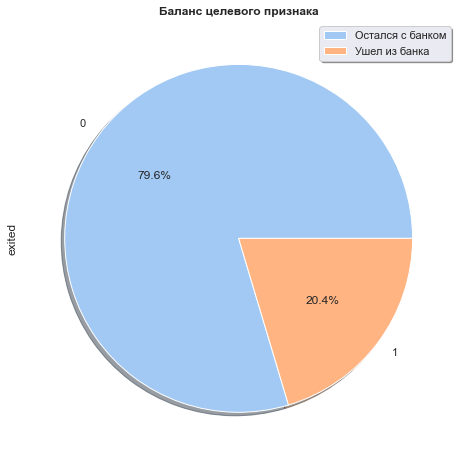

In [19]:
df.exited.value_counts().plot(kind='pie', shadow=True, autopct='%1.1f%%')
plt.legend(['Остался с банком', 'Ушел из банка'], shadow=True)
plt.title('Баланс целевого признака', fontweight="bold")
plt.show()

Как можно заметить, целевой признак несбалансирован. Количество положительных исходов составляет лишь 1/5 от общего количества. Нужно будет сбалансировать.

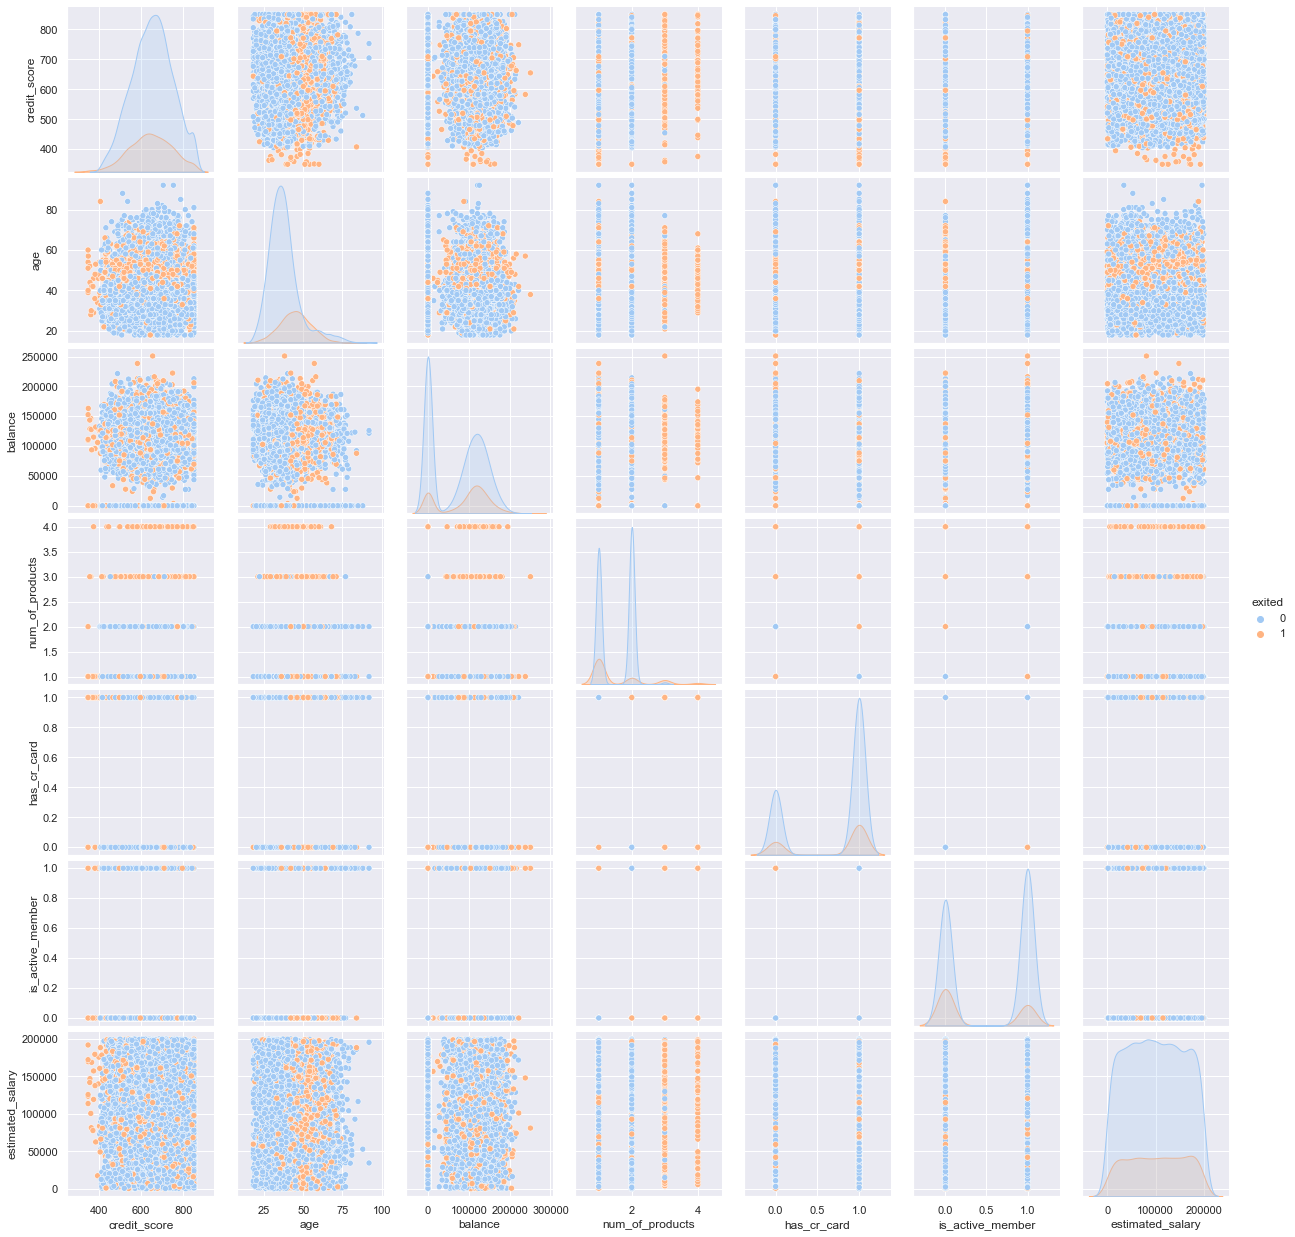

In [20]:
sns.pairplot(df, hue='exited')

Какой-то стопроцентной зависимости между уходом клиента и каким-то конкретным признаком с ходу заметить нельзя. Бросается в глаза, разве что, зависимость от возраста (чем старше, тем выше вероятность ухода), количеством продуктов (чем меньше продуктов банка использует клиент, тем выше вероятность ухода) и активностью клиента (чем менее активен клиент, тем выше вероятность ухода).

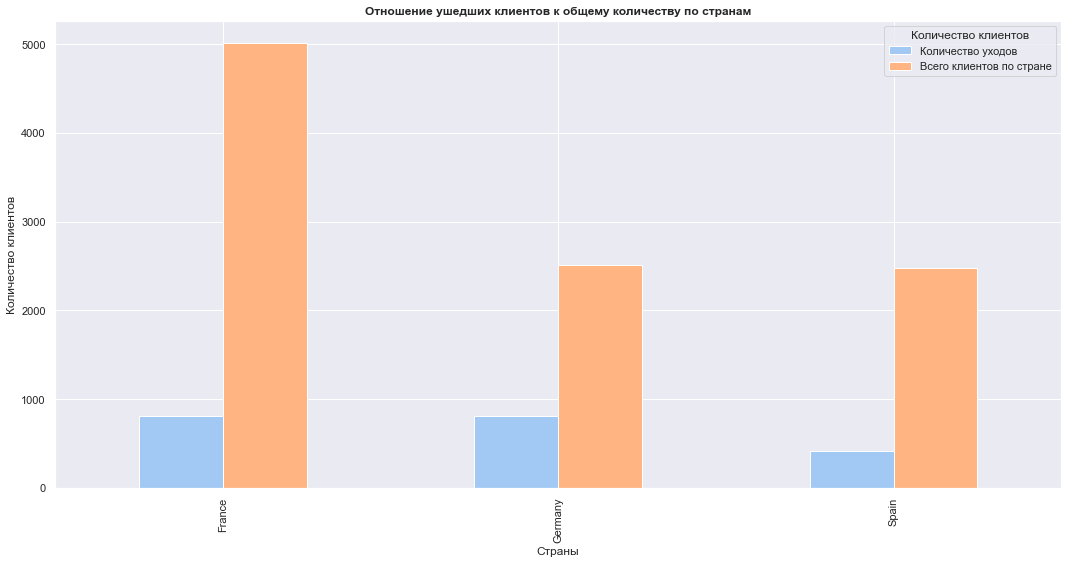

In [21]:
df.pivot_table(index='geography', values='exited', aggfunc=['sum', 'count']).plot(kind='bar')
plt.legend(['Количество уходов', 'Всего клиентов по стране']).set_title('Количество клиентов')
plt.xlabel('Страны')
plt.ylabel('Количество клиентов')
plt.title('Отношение ушедших клиентов к общему количеству по странам', fontweight="bold")
plt.tight_layout()
plt.show()

Как мы видим, больше всего клиентов во Франции, но доля ушедших по отношению к общему количеству выше в Германии. Стоит обратить на это внимание.

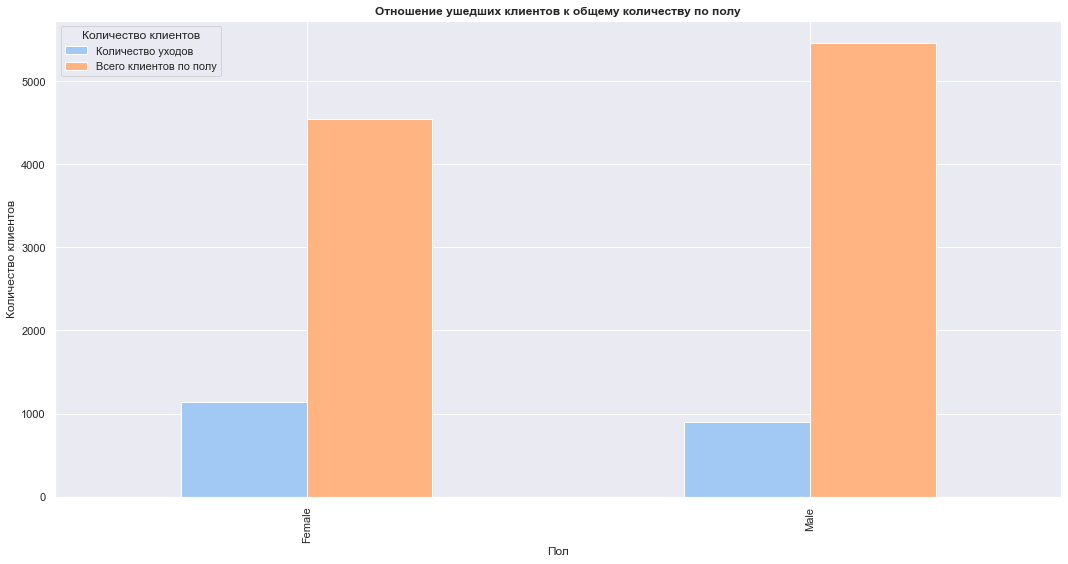

In [22]:
df.pivot_table(index='gender', values='exited', aggfunc=['sum', 'count']).plot(kind='bar')
plt.legend(['Количество уходов', 'Всего клиентов по полу']).set_title('Количество клиентов')
plt.xlabel('Пол')
plt.ylabel('Количество клиентов')
plt.title('Отношение ушедших клиентов к общему количеству по полу', fontweight="bold")
plt.tight_layout()
plt.show()

В общем количестве женщин меньше, но количество уходов больше. Также следует обратить внимание на данную закономерность.

### Изучение моделей без учета дисбаланса

На данном этапе создадим три модели без учета дисбаланса. Третья модель - дамми классифайер, будет служить контрольной моделью для проверки адекватности двух предыдущих.

In [23]:
features = df_ohe.drop('exited', axis=1) #Разбиваем на выборки
target = df_ohe['exited']
features_train, features_test, target_train, target_test = train_test_split(features,
                                                             target, test_size=0.4, random_state=12354)
features_valid, features_test, target_valid, target_test = train_test_split(features_test,
                                                             target_test, test_size=0.5, random_state=12354)
joint_features = features_train.append(features_valid) #Объединил валидационную и тренировочную выборки
joint_target = target_train.append(target_valid)       #в одну генеральную для моделей деревьев

In [24]:
unbalanced_model = LogisticRegression(random_state=3, solver='liblinear') #Создаем лог регрессию
unbalanced_model.fit(features_train, target_train)
prediction_valid = unbalanced_model.predict(features_valid)
print("Accuracy:", accuracy_score(target_valid, prediction_valid))
print("F1:", f1_score(target_valid, prediction_valid))
print("ROC_auc:", roc_auc_score(target_valid, prediction_valid))

Accuracy: 0.7965
F1: 0.11328976034858387
ROC_auc: 0.520414509087217


In [25]:
unbalanced_model = DecisionTreeClassifier(random_state=3) #Создаем дерево решений
unbalanced_model.fit(features_train, target_train)
prediction_valid = unbalanced_model.predict(features_valid)
print("Accuracy:", accuracy_score(target_valid, prediction_valid))
print("F1:", f1_score(target_valid, prediction_valid))
print("ROC_auc:", roc_auc_score(target_valid, prediction_valid))

Accuracy: 0.7925
F1: 0.48828606658446355
ROC_auc: 0.6838321149355264


In [26]:
unbalanced_model = DummyClassifier(random_state=3) #Проверяем адекватность на дамми 
unbalanced_model.fit(features_train, target_train)
prediction_valid = unbalanced_model.predict(features_valid)
print("Accuracy:", accuracy_score(target_valid, prediction_valid))
print("F1:", f1_score(target_valid, prediction_valid))
print("ROC_auc:", roc_auc_score(target_valid, prediction_valid))

Accuracy: 0.804
F1: 0.0
ROC_auc: 0.5


In [27]:
predict_const = pd.Series([0 for _ in range(*target_valid.shape)]) #Адекватность на константной модели
print("Accuracy:", accuracy_score(target_valid, predict_const))

Accuracy: 0.804


Как мы видим, при наличии дисбаланса показатель Accuracy является мнимым. Даже дамми классифайер смогла дать Accuracy на уровне 0,81, выше, чем дерево решений. Нужно масштабировать данные, решить проблему с дисбалансом и уже потом составлять модели.

## Борьба с дисбалансом

### Работа с дисбалансом

In [28]:
#Создадим функцию для увеличения выборки и применим ее
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=3)
    return features_upsampled, target_upsampled

In [29]:
features_train, target_train = upsample(features_train, target_train, 4)
joint_features, joint_target = upsample(joint_features, joint_target, 4)

In [30]:
joint_target.value_counts() #Выборку уравняли

1    6532
0    6367
Name: exited, dtype: int64

In [31]:
#Масштабируем
numeric = ['credit_score', 'age', 'balance', 'num_of_products', 'estimated_salary']
scaler = StandardScaler()
features_train_scal, features_valid_scal, features_test_scal = (features_train.copy(deep=True), 
                                                                features_valid.copy(deep=True), features_test.copy(deep=True))
scaler.fit(features_train_scal[numeric])
features_train_scal[numeric] = scaler.transform(features_train_scal[numeric])
features_valid_scal[numeric] = scaler.transform(features_valid_scal[numeric])
features_test_scal[numeric] = scaler.transform(features_test_scal[numeric])

In [32]:
print(features_train.shape)
print(target_train.shape)

(9723, 20)
(9723,)


In [33]:
print(features_train_scal.shape)

(9723, 20)


Мы отмасштабировали данные так, что теперь наши модели не будут игнорировать одни признаки в пользу других. Также мы в 4 раза увеличили выборку признаков с целевым признаком 1. Теперь пропорция положительных и отрицательных ответов 1:1. Можно строить модели.

### Создаем новые модели с учетом дисбаланса

**Decision Tree**

In [34]:
dt = DecisionTreeClassifier(random_state=3) #Строим модель решающего дерева
parameters_dt = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    #'splitter' : ['best', 'random'],
    #'max_features' : ['auto', 'sqrt', 'log2'],
    'max_depth' : [int(x) for x in np.linspace(1, 200, num = 200)],
    'min_samples_split' : [int(x) for x in range(2, 51, 2)],
    'min_samples_leaf' : [int(x) for x in range(1, 60)],
    'max_leaf_nodes' : [int(x) for x in range(1, 60)]
}
dt_model = RandomizedSearchCV(estimator=dt, param_distributions=parameters_dt, n_iter = 100, cv = 5, n_jobs=-1,
                              verbose=2, random_state=3, scoring='f1')
dt_model.fit(joint_features, joint_target)

print('F1:', dt_model.best_score_, 'с параметрами:', dt_model.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
F1: 0.7984251939579942 с параметрами: {'min_samples_split': 20, 'min_samples_leaf': 7, 'max_leaf_nodes': 56, 'max_depth': 83, 'criterion': 'gini'}


**Random Forest**

In [35]:
rf = RandomForestClassifier(random_state=3) #Строим модель случайного леса
parameters_rf = {
    #'criterion' : ['gini', 'entropy', 'log_loss'],
    'n_estimators' : [int(x) for x in range(3, 73, 3)],
    #'max_features' : [None, 'sqrt', 'log2'],
    'max_depth' : [int(x) for x in np.linspace(50, 100, num = 50)],
    'min_samples_split' : [int(x) for x in range(2, 31, 2)],
    'min_samples_leaf' : [int(x) for x in range(1, 25)],
    #'max_leaf_nodes' : [int(x) for x in range(1, 25)],
    #'bootstrap' : [True, False]
}
rf_model = RandomizedSearchCV(estimator=rf, param_distributions=parameters_rf, n_iter = 100, cv = 5,
                              verbose=2, random_state=3, scoring='f1')

rf_model.fit(joint_features, joint_target)

print('F1:', rf_model.best_score_, 'с параметрами:', rf_model.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=58, min_samples_leaf=7, min_samples_split=22, n_estimators=33; total time=   0.1s
[CV] END max_depth=58, min_samples_leaf=7, min_samples_split=22, n_estimators=33; total time=   0.1s
[CV] END max_depth=58, min_samples_leaf=7, min_samples_split=22, n_estimators=33; total time=   0.1s
[CV] END max_depth=58, min_samples_leaf=7, min_samples_split=22, n_estimators=33; total time=   0.1s
[CV] END max_depth=58, min_samples_leaf=7, min_samples_split=22, n_estimators=33; total time=   0.1s
[CV] END max_depth=72, min_samples_leaf=23, min_samples_split=26, n_estimators=27; total time=   0.0s
[CV] END max_depth=72, min_samples_leaf=23, min_samples_split=26, n_estimators=27; total time=   0.0s
[CV] END max_depth=72, min_samples_leaf=23, min_samples_split=26, n_estimators=27; total time=   0.0s
[CV] END max_depth=72, min_samples_leaf=23, min_samples_split=26, n_estimators=27; total time=   0.0s
[CV] END max_depth=72, m

**Logistic Regression**

In [36]:
#Строим логистическую регрессию
lr_model = LogisticRegression(random_state=3, class_weight='balanced', solver='liblinear', n_jobs=-1)
lr_model.fit(features_train_scal, target_train)
prediction_lr = lr_model.predict(features_valid_scal)
print("Accuracy:", accuracy_score(target_valid, prediction_lr))
print("F1:", f1_score(target_valid, prediction_lr))
print("ROC_auc:", roc_auc_score(target_valid, prediction_lr))

Accuracy: 0.699
F1: 0.46441281138790036
ROC_auc: 0.6864529393847092


In [37]:
#Изучаем порог лог регрессии на валидационной выборке
proba_one_lr_valid = lr_model.predict_proba(features_valid_scal)[:, 1]

for threshold in np.arange(0, 0.9, 0.02):
    predicted_test_lr_valid = proba_one_lr_valid > threshold
    precision = precision_score(target_valid, predicted_test_lr_valid)
    recall = recall_score(target_valid, predicted_test_lr_valid)
    f1 = f1_score(target_valid, predicted_test_lr_valid)
    roc_auc = roc_auc_score(target_valid, predicted_test_lr_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}, roc_auc = {:.3f}".format(
        threshold, precision, recall, f1, roc_auc))

Порог = 0.00 | Точность = 0.196, Полнота = 1.000, F1 = 0.328, roc_auc = 0.500
Порог = 0.02 | Точность = 0.196, Полнота = 1.000, F1 = 0.328, roc_auc = 0.500
Порог = 0.04 | Точность = 0.196, Полнота = 1.000, F1 = 0.328, roc_auc = 0.501
Порог = 0.06 | Точность = 0.197, Полнота = 1.000, F1 = 0.329, roc_auc = 0.503
Порог = 0.08 | Точность = 0.199, Полнота = 0.997, F1 = 0.331, roc_auc = 0.508
Порог = 0.10 | Точность = 0.201, Полнота = 0.997, F1 = 0.335, roc_auc = 0.516
Порог = 0.12 | Точность = 0.205, Полнота = 0.997, F1 = 0.340, roc_auc = 0.527
Порог = 0.14 | Точность = 0.210, Полнота = 0.992, F1 = 0.347, roc_auc = 0.541
Порог = 0.16 | Точность = 0.217, Полнота = 0.990, F1 = 0.356, roc_auc = 0.560
Порог = 0.18 | Точность = 0.220, Полнота = 0.972, F1 = 0.359, roc_auc = 0.567
Порог = 0.20 | Точность = 0.225, Полнота = 0.959, F1 = 0.364, roc_auc = 0.577
Порог = 0.22 | Точность = 0.232, Полнота = 0.952, F1 = 0.373, roc_auc = 0.592
Порог = 0.24 | Точность = 0.240, Полнота = 0.944, F1 = 0.382, ro

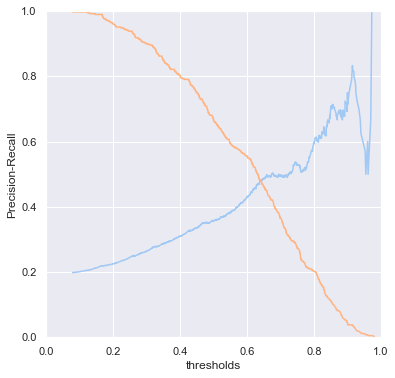

Best threshold = 0.64


In [38]:
from sklearn.metrics import precision_recall_curve
# import numpy as np

precision, recall, thresholds = precision_recall_curve(target_valid, proba_one_lr_valid)
plt.figure(figsize=(6, 6))
plt.plot(thresholds, precision[:-1])
plt.xlabel('thresholds')
plt.ylabel('Precision-Recall')
plt.plot(thresholds, recall[:-1])
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

print(f'Best threshold = {np.round(thresholds[np.argmin(np.abs(precision - recall))], 3)}')

**Gradient Boosting**

In [39]:
#gb = GradientBoostingClassifier(random_state=3) #Делаем модель градиентного бустинга
#parameters_gb = {
#    'loss' : ['log_loss', 'deviance', 'exponential'],
#    'n_estimators' : [int(x) for x in np.linspace(150, 350, num = 5)],
#    'max_depth' : [int(x) for x in range(1, 15)],
#    'learning_rate' : [x for x in np.arange(0.1, 0.6, 0.05)],
#    'criterion' : ['friedman_mse', 'squared_error', 'mse'],
#    'min_samples_split' : [int(x) for x in range(2, 21, 2)],
#    'min_samples_leaf' : [int(x) for x in range(1, 15)],
#    'max_features' : [None, 'auto', 'sqrt', 'log2'],
#    'max_leaf_nodes' : [int(x) for x in range(10, 25)]
#}
#gb_model = RandomizedSearchCV(estimator=gb, param_distributions=parameters_gb, n_iter = 100, cv = 5,
#                              verbose=2, random_state=3, scoring='f1')
#gb_model.fit(joint_features, joint_target)
#print('F1-оценка лучшей модели', gb_model.best_score_, 'с параметрами', gb_model.best_params_)

Мы отмасштабировали данные и увеличили выборку. Построили 4 модели:
- Decision Tree с показателями F1: 0.7984251939579942 с параметрами: {'min_samples_split': 20, 'min_samples_leaf': 7, 'max_leaf_nodes': 56, 'max_depth': 83, 'criterion': 'gini'}
- Random Forest с показателями F1: 0.9453430790571737 с параметрами: {'n_estimators': 48, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': 69}
- Logistic Regression с показателями по валидационной выборке Accuracy: 0.699, F1: 0.46441281138790036, ROC_auc: 0.6864529393847092. Но если мы исследуем пороговые значения для параметра 1, то получится самый высокий результат:
- Порог = 0.64 | Точность = 0.481, Полнота = 0.477, F1 = 0.479, roc_auc = 0.676
- Градиентный бустинг слишком долгий и выдает результаты на уровне логистической регрессии, так что в дальнейшем его рассматривать не будем

## Тестирование модели

Протестируем получившиеся модели на тестовой выборке и определим порог для логистической регрессии.

In [40]:
test_prediction_dt = dt_model.predict(features_test) #Проверяем decision tree на тестовой выборке
print("Accuracy dt:", accuracy_score(target_test, test_prediction_dt).round(3))
print("F1 dt:", f1_score(target_test, test_prediction_dt).round(3))
print("ROC_auc dt:", roc_auc_score(target_test, test_prediction_dt).round(3))
print('Precision dt:', precision_score(target_test, test_prediction_dt).round(3))
print('Recall dt:', recall_score(target_test, test_prediction_dt).round(3))

Accuracy dt: 0.802
F1 dt: 0.585
ROC_auc dt: 0.761
Precision dt: 0.506
Recall dt: 0.693


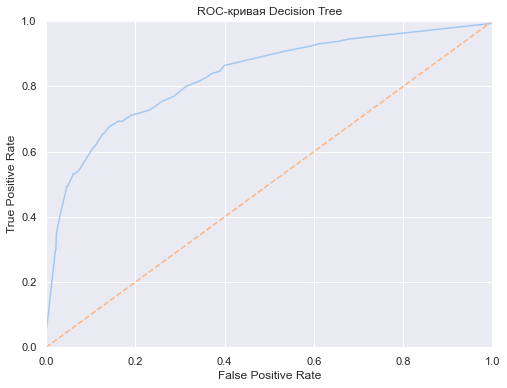

In [41]:
#Строим ROC-AUC для Decision Tree
proba_one_dt = dt_model.predict_proba(features_test)[:, 1]
fpr_dt, tpr_dt, threshold_dt = roc_curve(target_test, proba_one_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая Decision Tree')
plt.show()

In [42]:
fpr_dt

array([0.        , 0.        , 0.        , 0.00125313, 0.02067669,
       0.02067669, 0.02192982, 0.02318296, 0.03007519, 0.03007519,
       0.04699248, 0.04887218, 0.06140351, 0.06328321, 0.07330827,
       0.10275689, 0.11027569, 0.11466165, 0.11466165, 0.12656642,
       0.13157895, 0.14097744, 0.15601504, 0.1622807 , 0.16290727,
       0.17105263, 0.18922306, 0.19423559, 0.21428571, 0.23182957,
       0.24310777, 0.2575188 , 0.28634085, 0.31516291, 0.31766917,
       0.3302005 , 0.34085213, 0.35401003, 0.36090226, 0.37030075,
       0.38909774, 0.39912281, 0.53634085, 0.59210526, 0.61152882,
       0.6566416 , 0.6622807 , 0.68107769, 0.99561404, 1.        ])

In [43]:
test_prediction_rf = rf_model.predict(features_test) #Проверяем random forest
print("Accuracy rf:", accuracy_score(target_test, test_prediction_rf).round(3))
print("F1 rf:", f1_score(target_test, test_prediction_rf).round(3))
print("ROC_auc rf:", roc_auc_score(target_test, test_prediction_rf).round(3))
print('Precision rf:', precision_score(target_test, test_prediction_rf).round(3))
print('Recall rf:', recall_score(target_test, test_prediction_rf).round(3))

Accuracy rf: 0.847
F1 rf: 0.598
ROC_auc rf: 0.741
Precision rf: 0.637
Recall rf: 0.564


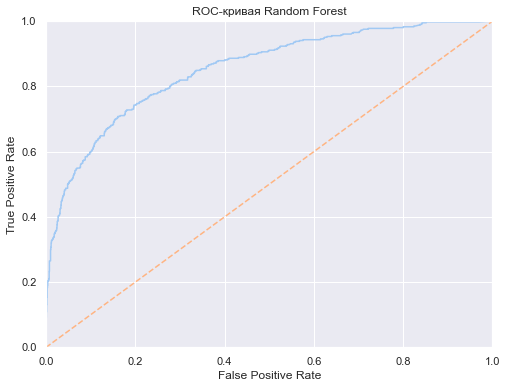

In [44]:
#Строим ROC-AUC для Random Forest
proba_one_rf = rf_model.predict_proba(features_test)[:, 1]
fpr_rf, tpr_rf, threshold_rf = roc_curve(target_test, proba_one_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая Random Forest')
plt.show()

In [45]:
test_prediction_lr = lr_model.predict(features_test_scal) #Проверяем decision tree на тестовой выборке
print("Accuracy dt:", accuracy_score(target_test, test_prediction_lr).round(3))
print("F1 dt:", f1_score(target_test, test_prediction_lr).round(3))
print("ROC_auc dt:", roc_auc_score(target_test, test_prediction_lr).round(3))

Accuracy dt: 0.732
F1 dt: 0.513
ROC_auc dt: 0.72


In [46]:
#Изучаем порог лог регрессии
proba_one_lr = lr_model.predict_proba(features_test_scal)[:, 1]
fpr_lr, tpr_lr, threshold_lr = roc_curve(target_test, proba_one_lr)

for threshold in np.arange(0, 0.9, 0.02):
    predicted_test_lr = proba_one_lr > threshold
    precision = precision_score(target_test, predicted_test_lr)
    recall = recall_score(target_test, predicted_test_lr)
    f1 = f1_score(target_test, predicted_test_lr)
    accuracy = accuracy_score(target_test, predicted_test_lr)
    roc_auc_lr = roc_auc_score(target_test, predicted_test_lr)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}, Accuracy = {:.3f}, roc_auc = {:.3f}".format(
        threshold, precision, recall, f1, accuracy, roc_auc_lr))

Порог = 0.00 | Точность = 0.202, Полнота = 1.000, F1 = 0.336, Accuracy = 0.202, roc_auc = 0.500
Порог = 0.02 | Точность = 0.202, Полнота = 1.000, F1 = 0.336, Accuracy = 0.202, roc_auc = 0.500
Порог = 0.04 | Точность = 0.202, Полнота = 1.000, F1 = 0.336, Accuracy = 0.202, roc_auc = 0.500
Порог = 0.06 | Точность = 0.203, Полнота = 1.000, F1 = 0.337, Accuracy = 0.205, roc_auc = 0.502
Порог = 0.08 | Точность = 0.205, Полнота = 1.000, F1 = 0.340, Accuracy = 0.214, roc_auc = 0.508
Порог = 0.10 | Точность = 0.208, Полнота = 1.000, F1 = 0.345, Accuracy = 0.232, roc_auc = 0.518
Порог = 0.12 | Точность = 0.212, Полнота = 0.998, F1 = 0.350, Accuracy = 0.252, roc_auc = 0.530
Порог = 0.14 | Точность = 0.216, Полнота = 0.995, F1 = 0.355, Accuracy = 0.269, roc_auc = 0.540
Порог = 0.16 | Точность = 0.221, Полнота = 0.993, F1 = 0.362, Accuracy = 0.292, roc_auc = 0.554
Порог = 0.18 | Точность = 0.226, Полнота = 0.978, F1 = 0.368, Accuracy = 0.321, roc_auc = 0.566
Порог = 0.20 | Точность = 0.232, Полнота

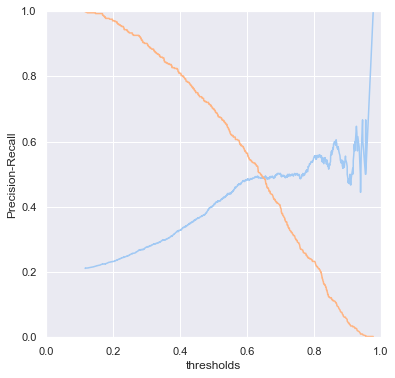

Best threshold = 0.649


In [47]:
precision_test, recall_test, thresholds_test = precision_recall_curve(target_test, proba_one_lr)
plt.figure(figsize=(6, 6))
plt.plot(thresholds_test, precision_test[:-1])
plt.xlabel('thresholds')
plt.ylabel('Precision-Recall')
plt.plot(thresholds_test, recall_test[:-1])
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

print(f'Best threshold = {np.round(thresholds_test[np.argmin(np.abs(precision_test - recall_test))], 3)}')

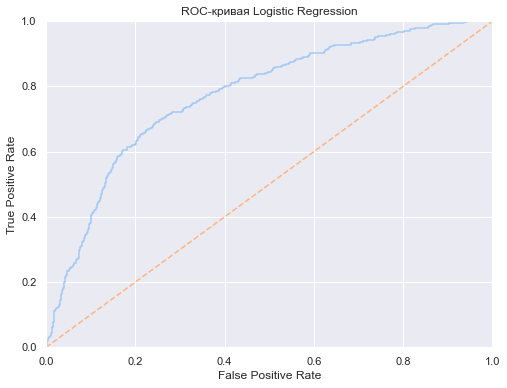

In [48]:
#Строим ROC-AUC для Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая Logistic Regression')
plt.show()

In [49]:
dummy_test_model = DummyClassifier(random_state=3) #Проверяем адекватность на дамми 
dummy_test_model.fit(features_train, target_train)
prediction_valid_dummy = dummy_test_model.predict(features_valid)
print("Accuracy:", accuracy_score(target_valid, prediction_valid_dummy))
print("F1:", f1_score(target_valid, prediction_valid_dummy))
print("ROC_auc:", roc_auc_score(target_valid, prediction_valid_dummy))
proba_one_dc = dummy_test_model.predict_proba(features_test)[:, 1]
fpr_dc, tpr_dc, threshold_dc = roc_curve(target_test, proba_one_dc)

Accuracy: 0.196
F1: 0.3277591973244147
ROC_auc: 0.5


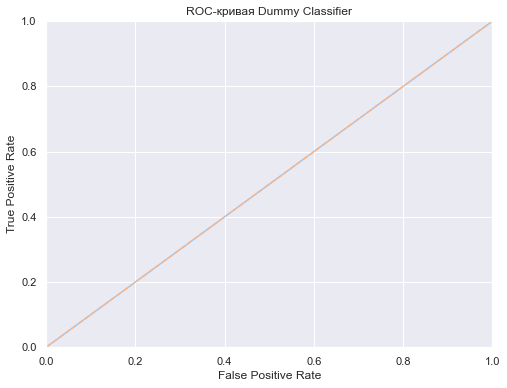

In [50]:
#Строим ROC-AUC для Dummy Classifier
plt.figure(figsize=(8, 6))
plt.plot(fpr_dc, tpr_dc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая Dummy Classifier')
plt.show()

- Как видно и на валидационной выборке, и на тестовой, лучший порог для нашей логистической регрессии 0,64. Её показатели: Порог = 0.64 | Точность = 0.488, Полнота = 0.500, F1 = 0.494, Accuracy = 0.793, roc_auc = 0.684
- Показатели модели Decision Tree Accuracy dt: Accuracy dt: 0.802, F1 dt: 0.585, ROC_auc dt: 0.761, Precision dt: 0.506, Recall dt: 0.693. По совокупности показателей эта модель находится на втором месте. Уровень показателя F1 всего лишь чуть-чуть не удовлетворяет нашему целевому показателю в 0,59, но остальные метрики весьма достойны, а сама модель быстрее случайного леса.
- Наша самая лучшая модель - Random Forest, с показателями Accuracy rf: 0.847, F1 rf: 0.598, ROC_auc rf: 0.741, Precision rf: 0.637, Recall rf: 0.564. Мера F1 у нас достигает почти 0,6, что достигает всех наших целей. Кривая ROC нас также удовлетворяет больше всех.
- Все модели прошли проверку на адекватность через Dummy Classifier.

## Общий вывод

- Мы подготовили данные, избавились от лишних столбцов `surname`, `row_number` и `customer_id`. Столбец `tenure` привели к типу `object` и через метод get_dummies, вместе со столбцами `geography` и `gender` привели эти категориальные признаки к численным.
- Провели небольшое исследование. Выяснили, что имеется зависимость от возраста (чем старше, тем выше вероятность ухода), количества продуктов (чем меньше продуктов банка использует клиент, тем выше вероятность ухода) и активности клиента (чем менее активен клиент, тем выше вероятность ухода). Также больше всего клиентов во Франции, но доля ушедших по отношению к общему количеству выше в Германии. Еще в общем количестве женщин меньше, но количество уходов больше. 
- Целевой признак был несбалансирован. Количество положительных исходов составляло лишь 1/5 от общего количества. Мы сбалансировали в дальнейшем.
- Провели исследование моделей без учета дисбаланса и выяснили, что они неадекватны. 
- Провели масштабирование признаков и уравняли целевой признак, увеличив признак 1 в 4 раза.
- Создали новые модели с учетом дисбаланса.
- Модель градиентного бустинга отсеяли из-за низкого быстродействия и посредственных результатов.
- Лучше всех была модель Random Forest с показателями F1: 0.9453430790571737 с параметрами: {'n_estimators': 48, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': 69}. Логистическая регрессия не удовлетворила нашему показателю F1.
- Проверили все получившиеся модели на тестовых выборках, предварительно дообучив их на общих данных по валидационной и обучающей выборке.
- Второе место - модель решающего дерева с показателями F1: 0.7984251939579942 с параметрами: {'min_samples_split': 20, 'min_samples_leaf': 7, 'max_leaf_nodes': 56, 'max_depth': 83, 'criterion': 'gini'}
- Самая лучшая модель - модель случайного леса с показателями Accuracy rf: 0.847, F1 rf: 0.598, ROC_auc rf: 0.741, Precision rf: 0.637, Recall rf: 0.564, что достигает всех наших целей по F1 выше 0,59.
- Проверили получившиеся модели на адекватность в сравнении с дамми. Проверку прошли.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*

In [51]:
#import optuna

#def objective(trial):
#    iris = sklearn.datasets.load_iris()
    
#    n_estimators = trial.suggest_int('n_estimators', 2, 20)
#    max_depth = int(trial.suggest_float('max_depth', 1, 32, log=True))
    
#    clf = sklearn.ensemble.RandomForestClassifier(
#        n_estimators=n_estimators, max_depth=max_depth)
    
#    return sklearn.model_selection.cross_val_score(
#        clf, iris.data, iris.target, n_jobs=-1, cv=3).mean()

#study = optuna.create_study(direction='maximize')
#study.optimize(objective, n_trials=100)

#trial = study.best_trial

#print('Accuracy: {}'.format(trial.value))
#print("Best hyperparameters: {}".format(trial.params))